In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext jupyter_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from mls_scf_tools.mls_pint import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]
# fmt: on

In [2]:
from scipy import sparse
import warnings

In [3]:
%autoreload 2

In [4]:
import dualpy as dp
from dualpy.numeric_jacobians import compute_numeric_jacobians

Defining Unitless


In [5]:
dp.set_config(check_jacobians=True)

In [6]:
N = 2**8  # 2**12
omega_in = 4 * 2 * np.pi / 100.0
omega_in = dp.seed(omega_in, "omega_in")
print(omega_in.jacobians)
t = np.arange(N, dtype=float)
t = dp.seed(t, "t")
x = np.sin(omega_in * t) * ureg.dimensionless
# x = np.zeros(N)
# x[2000:2100] = 1.0
# x = dp.seed(x, "x")

{'omega_in': Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is () <1>
Independent shape is () <1>
Combined they are () <1>
Dummies are () and ()
Units are d<Unitless>/d<Unitless> = <Unitless>
data is <class 'numpy.ndarray'>([], dtype=float64)}


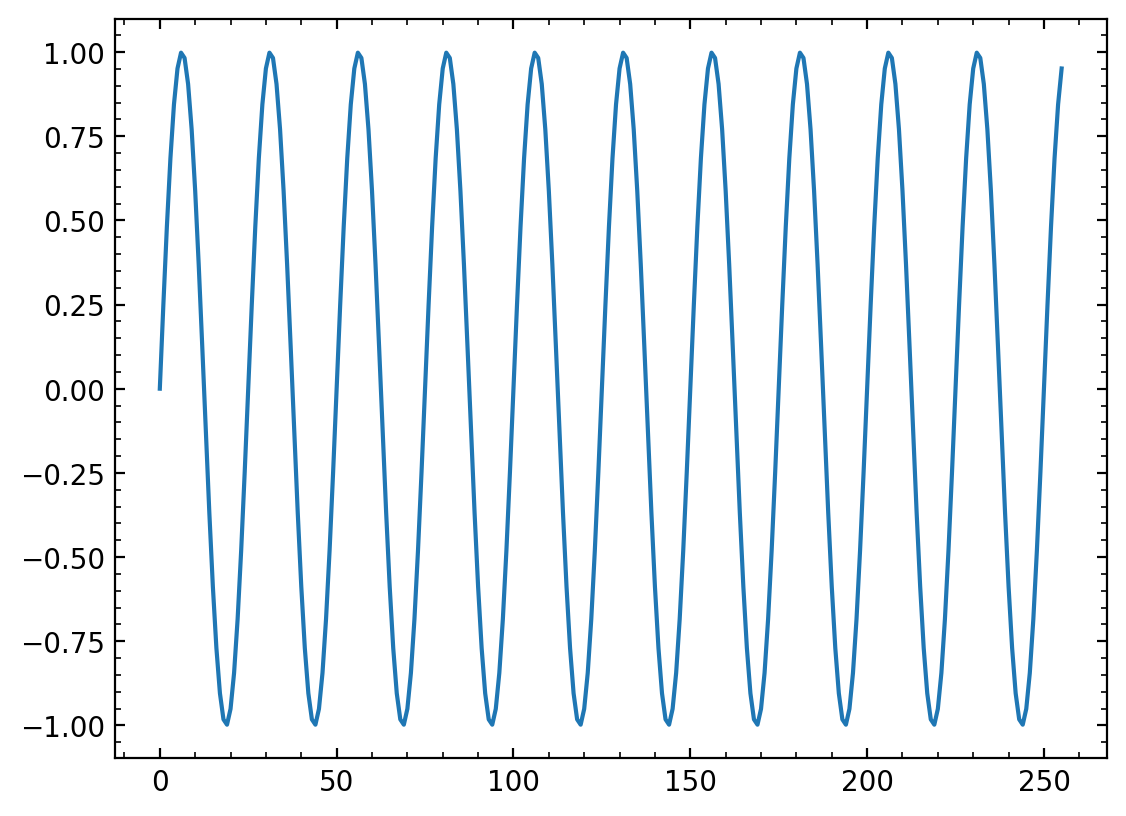

In [7]:
plt.plot(t, x);

In [8]:
NN = int(N / 2 + 1)
omega = np.arange(NN)
X = dp.rfft(x)

AssertionError: dtype mismatch for <unknown dense Jacobian> Jacobian <unnamed-jacobian> (self.dtype=dtype('float64'), self.data.dtype=dtype('complex128'))

In [ ]:
X.jacobians["x"]

In [ ]:
plt.semilogy(omega, np.abs(X));

In [ ]:
j_ana, j_num = compute_numeric_jacobians(dp.rfft, args=[x])

In [ ]:
r_ana = np.abs(j_ana.jacobians["x"].todensearray())
r_num = np.abs(j_num.jacobians["x"].todensearray())
theta_ana = np.angle(j_ana.jacobians["x"].todensearray().magnitude)
theta_num = np.angle(j_num.jacobians["x"].todensearray().magnitude)

In [ ]:
plt.plot(r_ana.ravel() - 1.0, r_num.ravel() - 1.0, ".")

In [ ]:
fig, axes = plt.subplots(2)
axes[0].imshow(theta_ana)
axes[1].imshow(theta_num)

In [ ]:
delta = theta_ana - theta_num
delta = np.where(delta < -6, delta + 2 * np.pi, delta)
delta = np.where(delta > 6, delta - 2 * np.pi, delta)

In [ ]:
plt.imshow(delta)
plt.colorbar()

In [ ]:
plt.plot(delta.ravel(), ".")